## HDDM Analysis of raw reaction times


Models for Drit-Rate (v) and Bias (z) dependent on main effects (Stim and Level) and Conditions
--> 6 Models are estimated

-----
         Main effects:                                Conditions:
----
       Stim:
        - happy                                     - happy 8ms
        - sad                                       - happy 16ms
        - neutral                                   - happy 25ms
                                                    - happy 141ms
        Level:                                      - sad 8ms
        - 141ms                                     - sad 16ms
        - 25ms                                      - sad 25ms
        - 16ms                                      - sad 141ms
        - 8ms                                       - neutral 8ms
                                                    - neutral 16ms
                                                    - neutral 25ms
                                                    - neutral 141ms
                                                    
                                                    

In [1]:
#Load in packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import hddm
print (hddm.__version__)

0.6.0


C:\Users\juhoffmann\Anaconda3\envs\hddm_analysis\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
#Load in dataset
data = hddm.load_csv('Path/hddm_analysis_data.csv')
data = data.drop(['Unnamed: 0'], axis=1) #Drop unnecessary column
data = data.dropna(subset=['rt'])        #Delete NAN
data.head(10)                            #View first 10 rows of dataset

,subj_idx,rt,correct,response,stim,level,real_trial_number,trial,block,conditions
0,EmoCon002,0.882655,1.0,neutral,neutral,8ms,246.0,5.0,3.0,8ms_neutral
1,EmoCon002,0.615015,1.0,neutral,neutral,8ms,247.0,6.0,3.0,8ms_neutral
2,EmoCon002,0.546029,1.0,neutral,neutral,8ms,248.0,7.0,3.0,8ms_neutral
3,EmoCon002,1.177777,0.0,happy,neutral,8ms,253.0,12.0,3.0,8ms_neutral
4,EmoCon002,1.255196,0.0,sad,happy,8ms,256.0,15.0,3.0,8ms_happy
5,EmoCon002,0.864299,1.0,sad,sad,8ms,259.0,18.0,3.0,8ms_sad
6,EmoCon002,0.810783,1.0,neutral,neutral,8ms,261.0,20.0,3.0,8ms_neutral
7,EmoCon002,0.889715,0.0,neutral,sad,8ms,262.0,21.0,3.0,8ms_sad
8,EmoCon002,0.682651,1.0,happy,happy,8ms,264.0,23.0,3.0,8ms_happy
9,EmoCon002,0.813204,1.0,happy,happy,8ms,266.0,25.0,3.0,8ms_happy


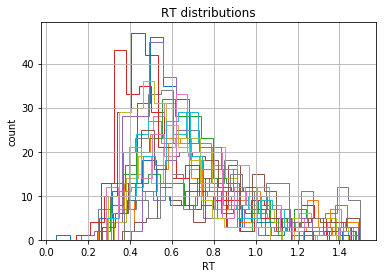

In [6]:
#Draw reaction time distributions
data = hddm.utils.flip_errors(data)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('figures/hddm_RT_distribution.pdf')

# Model for drift-rate depending on conditions
### Gelman Rubin R Statistic for convergence check


In [76]:
models = list()
for i in range(5): #Estimate Model 5 times
    m = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'conditions'})  #Drift-rate v dependent on 12 conditions
    m.find_starting_values() 
    m.sample(100000, burn=500, thin=5)  #Draw 10.000 samples, burn first 500, every 5ths sample will be saved
    models.append(m)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains

 [-----------------100%-----------------] 100000 of 100000 complete in 8790.0 secc

{'a': 1.0088593477741508,
 'a_std': 1.0002487171938563,
 'a_subj.EMOCONPILOT001': 1.0100315014098271,
 'a_subj.EMOCONPILOT003': 1.0073384979504887,
 'a_subj.EMOCONPILOT004': 1.0041961582134302,
 'a_subj.EMOCONPILOT005_120HZ': 1.0078991880302521,
 'a_subj.EMOCONPILOT006': 1.00075039197863,
 'a_subj.EMOCONPILOT007': 1.004610646028301,
 'a_subj.EMOCONPILOT008': 1.0066999056290573,
 'a_subj.EMOCONPILOT009': 1.007616100291872,
 'a_subj.EMOCONPILOT010': 1.0059166696012065,
 'a_subj.EMOCONPILOT011': 1.0102434656624177,
 'a_subj.EMOCONPILOT014': 1.0056053701535883,
 'a_subj.EMOCONPILOT015': 1.0069566520420519,
 'a_subj.EMOCONPILOT016': 1.006460768964535,
 'a_subj.EMOCONPILOT017': 1.0095440356958636,
 'a_subj.EMOCONPILOT018': 1.0065630496939446,
 'a_subj.EMOCONPILOT020': 1.0060628598296804,
 'a_subj.EMOCONPILOT021': 1.0099711359037924,
 'a_subj.EMOCONPILOT022': 1.0057129700001506,
 'a_subj.EMOCONPILOT024': 1.0007132248297324,
 'a_subj.EmoCon002': 1.007440911422318,
 't': 1.0084818326917535,
 't

Plotting a
Plotting a_std
Plotting v(141ms_happy)
Plotting v(141ms_neutral)
Plotting v(141ms_sad)
Plotting v(16ms_happy)
Plotting v(16ms_neutral)
Plotting v(16ms_sad)
Plotting v(25ms_happy)
Plotting v(25ms_neutral)
Plotting v(25ms_sad)
Plotting v(8ms_happy)
Plotting v(8ms_neutral)
Plotting v(8ms_sad)
Plotting v_std
Plotting t
Plotting t_std


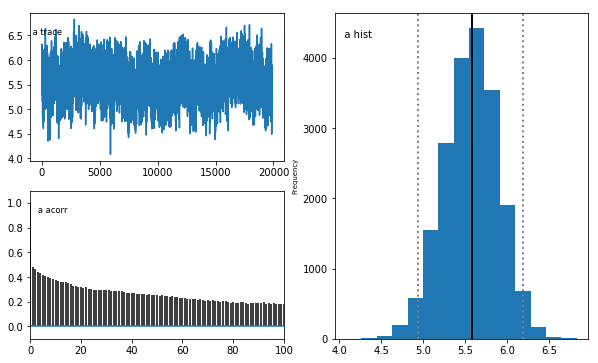

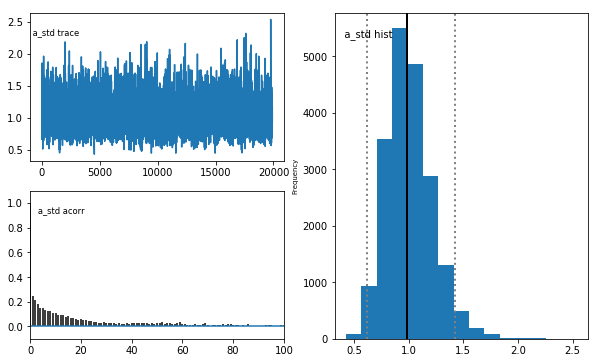

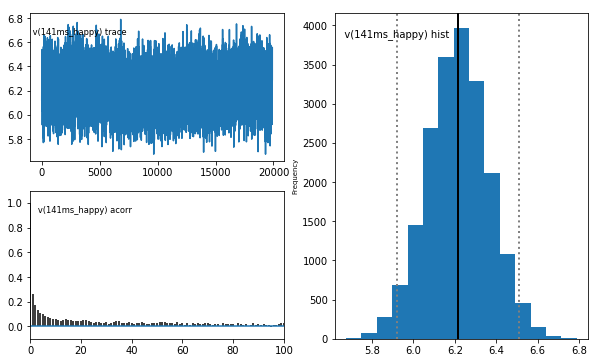

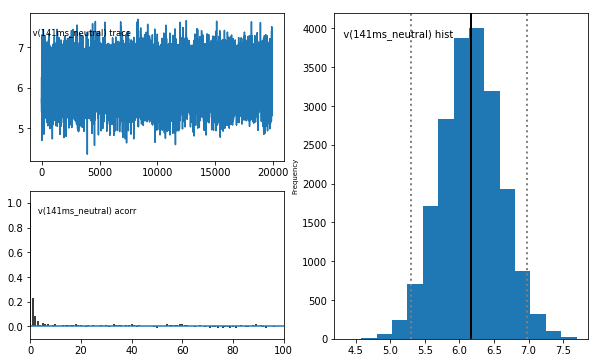

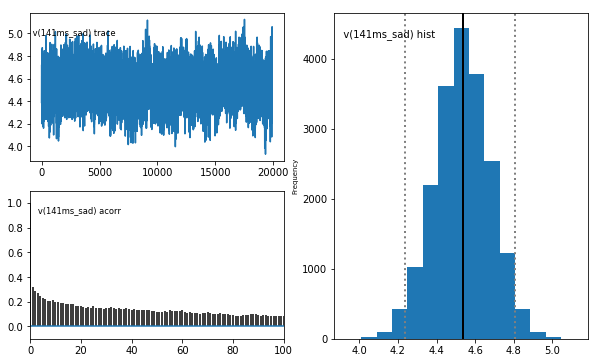

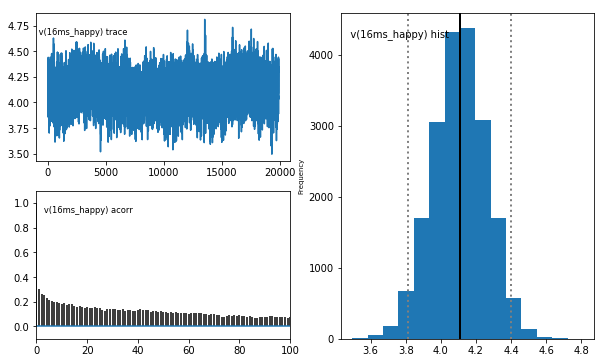

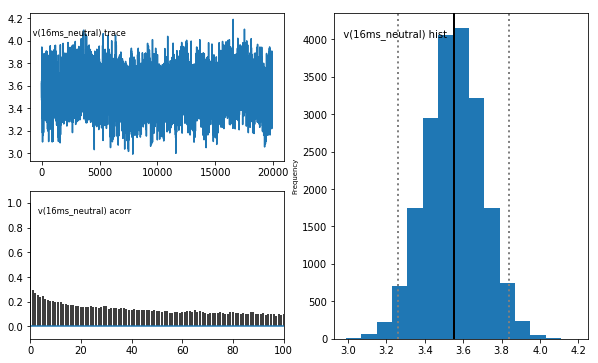

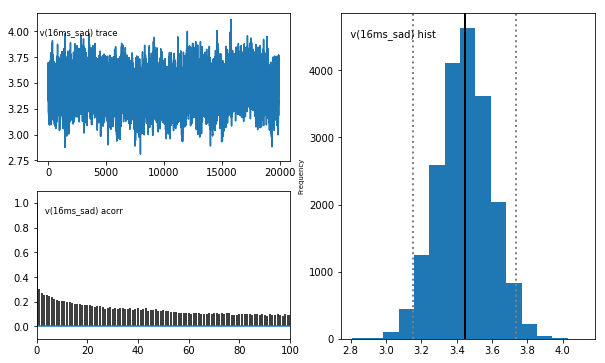

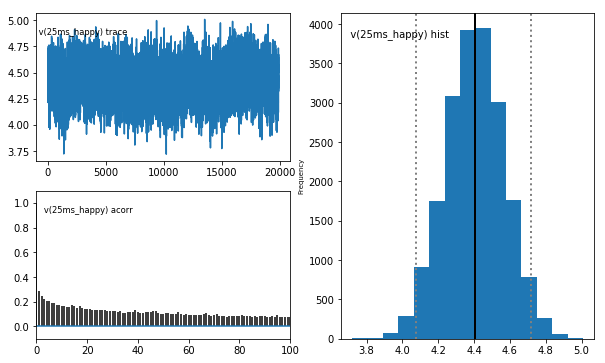

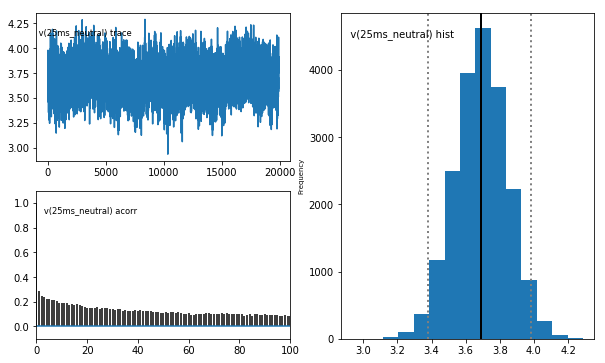

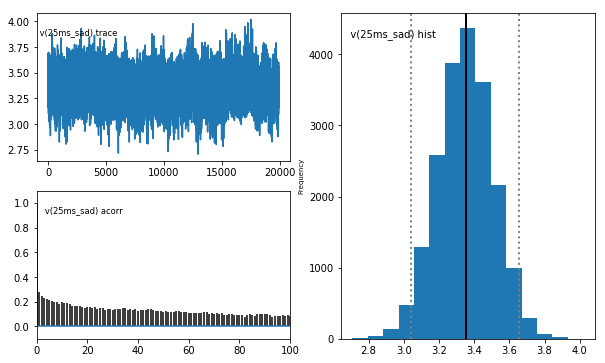

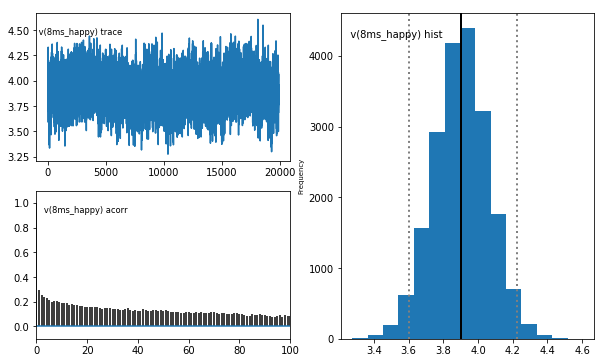

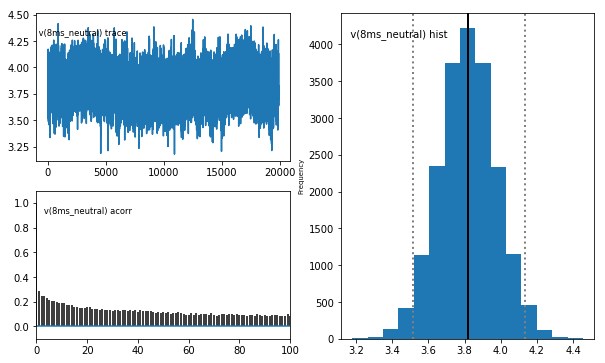

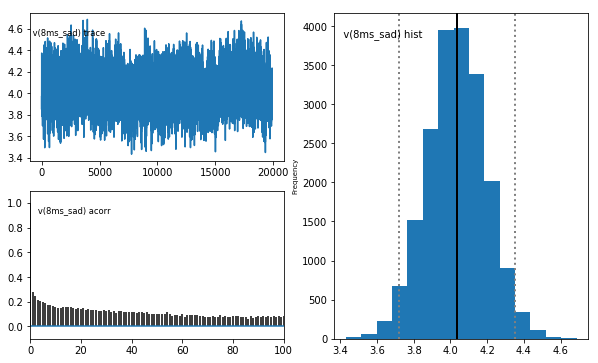

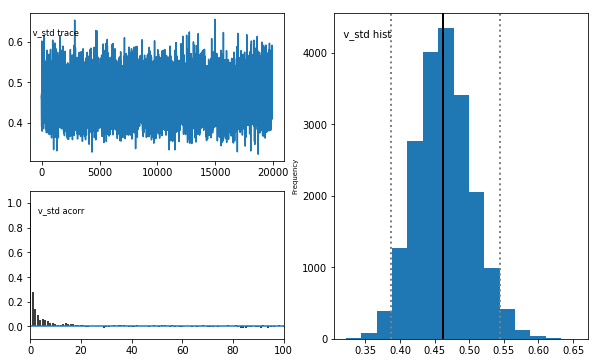

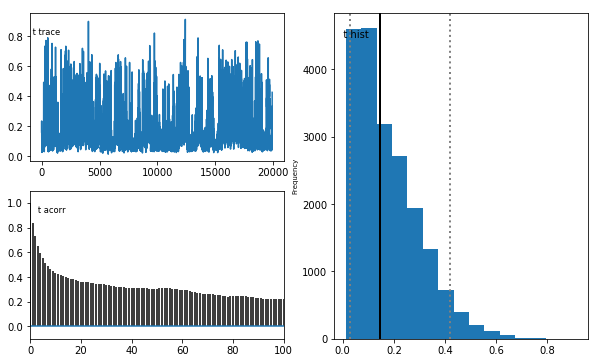

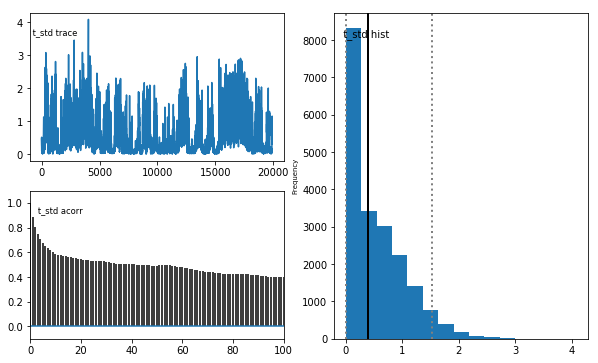

In [77]:
m.plot_posteriors()

In [78]:
m.print_stats()

                                                  mean        std         2.5q          25q          50q         75q      97.5q       mc err
a                                              5.56747   0.320864      4.92222      5.35301      5.57868        5.79    6.17187    0.0159571
a_std                                          1.00921   0.210765     0.660479     0.861623     0.987418     1.13112    1.48061   0.00412141
a_subj.EMOCONPILOT001                          4.85778   0.451288      3.96405      4.51342      4.88749      5.2363    5.57643    0.0216646
a_subj.EMOCONPILOT003                          6.57281   0.447065       5.5447      6.29906      6.66282     6.89735    7.24594    0.0222983
a_subj.EMOCONPILOT004                          5.79569   0.284012      5.15069      5.63486      5.81804     5.98912    6.29067    0.0116982
a_subj.EMOCONPILOT005_120HZ                    5.48687   0.331636      4.67138      5.31793      5.55138     5.71637    5.98513    0.0169339
a_subj.EMOCON

# Plot Drift-Rates for all conditions

In [79]:
import matplotlib.pyplot

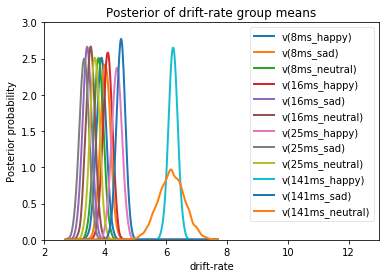

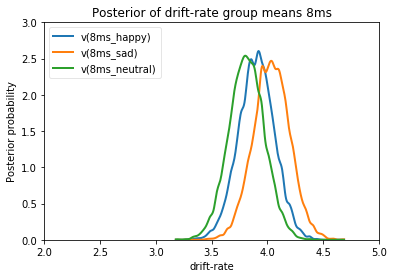

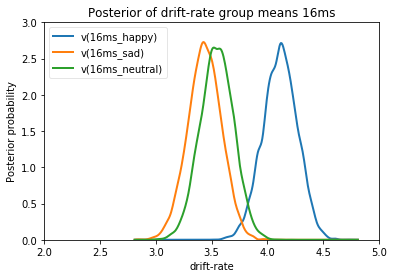

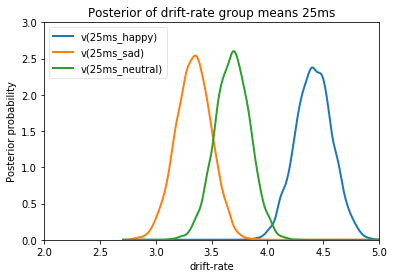

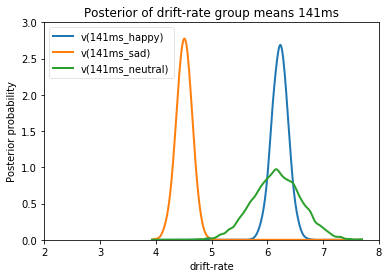

In [80]:
v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral  = m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)','v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)', 'v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)', 'v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2,13)
plt.ylim(0,3)

v_8ms_happy, v_8ms_sad, v_8ms_neutral= m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 8ms')
plt.xlim(2,5)
plt.ylim(0,3)

v_16ms_happy, v_16ms_sad, v_16ms_neutral= m.nodes_db.node[['v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_16ms_happy, v_16ms_sad, v_16ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 16ms')
plt.xlim(2,5)
plt.ylim(0,3)

v_25ms_happy, v_25ms_sad, v_25ms_neutral= m.nodes_db.node[['v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_25ms_happy, v_25ms_sad, v_25ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 25ms')
plt.xlim(2,5)
plt.ylim(0,3)

v_141ms_happy, v_141ms_sad, v_141ms_neutral= m.nodes_db.node[['v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 141ms')
plt.xlim(2,8)
plt.ylim(0,3)


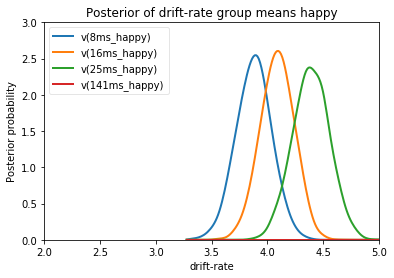

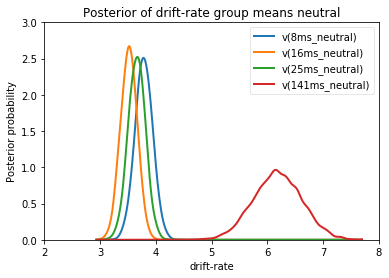

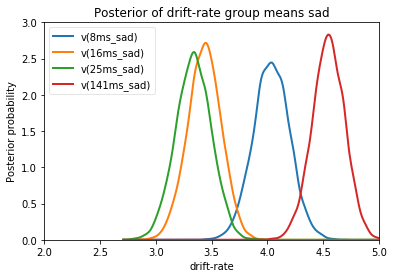

In [81]:
v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy= m.nodes_db.node[['v(8ms_happy)', 'v(16ms_happy)', 'v(25ms_happy)', 'v(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means happy')
plt.xlim(2,5)
plt.ylim(0,3)


v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral= m.nodes_db.node[['v(8ms_neutral)', 'v(16ms_neutral)', 'v(25ms_neutral)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means neutral')
plt.xlim(2,8)
plt.ylim(0,3)

v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad= m.nodes_db.node[['v(8ms_sad)', 'v(16ms_sad)', 'v(25ms_sad)', 'v(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means sad')
plt.xlim(2,5)
plt.ylim(0,3)


# Get statistics

In [82]:
print "P(8ms_happy > 8ms_sad)=",(v_8ms_happy.trace() > v_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(v_8ms_happy.trace() > v_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(v_16ms_happy.trace() > v_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(v_16ms_happy.trace() > v_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(v_25ms_happy.trace() > v_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(v_25ms_happy.trace() > v_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(v_141ms_happy.trace() > v_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(v_141ms_happy.trace() > v_141ms_neutral.trace()).mean()


print "P(8ms_happy > 16ms_happy)=",(v_8ms_happy.trace() > v_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(v_8ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(v_8ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(v_16ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(v_16ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(v_25ms_happy.trace() > v_141ms_happy.trace()).mean()


print "P(8ms_sad > 16ms_sad)=",(v_8ms_sad.trace() > v_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(v_8ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(v_8ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(v_16ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(v_16ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(v_25ms_sad.trace() > v_141ms_sad.trace()).mean()


print "P(8ms_neutral > 16ms_neutral)=",(v_8ms_neutral.trace() > v_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(v_8ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(v_8ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(v_16ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(v_16ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(v_25ms_neutral.trace() > v_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 0.2422110552763819
P(8ms_happy > 8ms_neutral)= 0.6782914572864321
P(16ms_happy > 16ms_sad)= 0.9998994974874372
P(16ms_happy > 16ms_neutral)= 0.9987939698492462
P(25ms_happy > 25ms_sad)= 1.0
P(25ms_happy > 25ms_neutral)= 0.9996984924623116
P(141ms_happy > 141ms_sad)= 1.0
P(141ms_happy > 141ms_neutral)= 0.5485929648241206
P(8ms_happy > 16ms_happy)= 0.12884422110552765
P(8ms_happy > 25ms_happy)= 0.0051256281407035175
P(8ms_happy > 141ms_happy)= 0.0
P(16ms_happy > 25ms_happy)= 0.058241206030150754
P(16ms_happy > 141ms_happy)= 0.0
P(25ms_happy > 141ms_happy)= 0.0
P(8ms_sad > 16ms_sad)= 0.9993467336683417
P(8ms_sad > 25ms_sad)= 0.9998492462311558
P(8ms_sad > 141ms_sad)= 0.0023115577889447235
P(16ms_sad > 25ms_sad)= 0.7022613065326633
P(16ms_sad > 141ms_sad)= 0.0
P(25ms_sad > 141ms_sad)= 0.0
P(8ms_neutral > 16ms_neutral)= 0.9310050251256281
P(8ms_neutral > 25ms_neutral)= 0.754070351758794
P(8ms_neutral > 141ms_neutral)= 0.0
P(16ms_neutral > 25ms_neutral)= 0.21663316582

# Model for bias depending on conditions
### Gelman Rubin R Statistic for convergence check

In [4]:
models = list()
for i in range(5):
    m_bias = hddm.HDDM(data, bias= True, p_outlier=0.05,depends_on={'z': 'conditions'})   
    m_bias.find_starting_values()
    m_bias.sample(100000, burn=500, thin=5)
    models.append(m_bias)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 100000 of 100000 complete in 11727.0 sec

{'a': 1.000920483779096,
 'a_std': 1.0001547147201786,
 'a_subj.EMOCONPILOT001': 1.0003426756032345,
 'a_subj.EMOCONPILOT003': 1.0005418822527947,
 'a_subj.EMOCONPILOT004': 1.0005303024161711,
 'a_subj.EMOCONPILOT005_120HZ': 1.0007368888259336,
 'a_subj.EMOCONPILOT006': 1.0004763784523238,
 'a_subj.EMOCONPILOT007': 1.0002588035649649,
 'a_subj.EMOCONPILOT008': 1.0002654898922856,
 'a_subj.EMOCONPILOT009': 1.0005600950156215,
 'a_subj.EMOCONPILOT010': 1.000446032324209,
 'a_subj.EMOCONPILOT011': 1.0002743651285007,
 'a_subj.EMOCONPILOT014': 1.0004682962553022,
 'a_subj.EMOCONPILOT015': 1.0004373311766277,
 'a_subj.EMOCONPILOT016': 1.0008263278158391,
 'a_subj.EMOCONPILOT017': 1.000710663730619,
 'a_subj.EMOCONPILOT018': 1.0009081793263765,
 'a_subj.EMOCONPILOT020': 1.0007701604623749,
 'a_subj.EMOCONPILOT021': 1.0006046573180245,
 'a_subj.EMOCONPILOT022': 1.000411487172685,
 'a_subj.EMOCONPILOT024': 1.0005360218021897,
 'a_subj.EmoCon002': 1.0006580816577293,
 't': 1.0000598056089012,
 

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(141ms_happy)
Plotting z(141ms_neutral)
Plotting z(141ms_sad)
Plotting z(16ms_happy)
Plotting z(16ms_neutral)
Plotting z(16ms_sad)
Plotting z(25ms_happy)
Plotting z(25ms_neutral)
Plotting z(25ms_sad)
Plotting z(8ms_happy)
Plotting z(8ms_neutral)
Plotting z(8ms_sad)
Plotting z_std


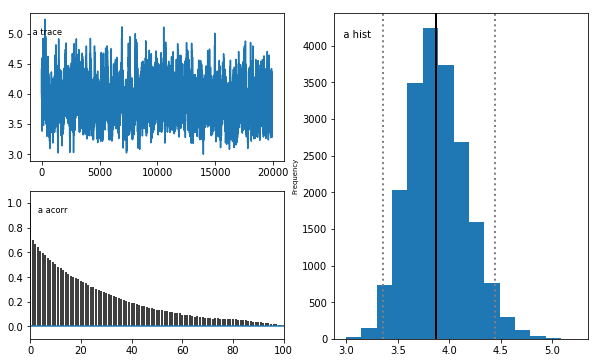

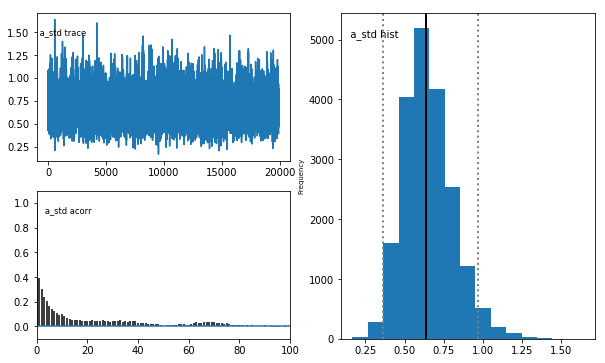

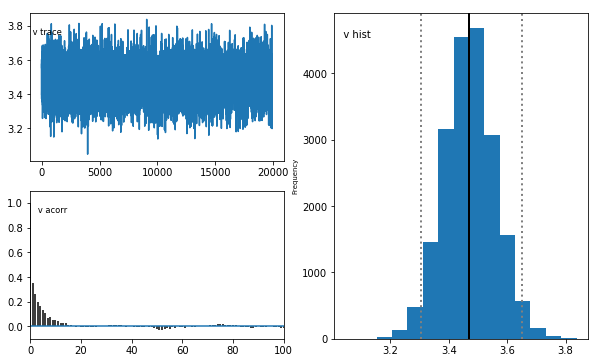

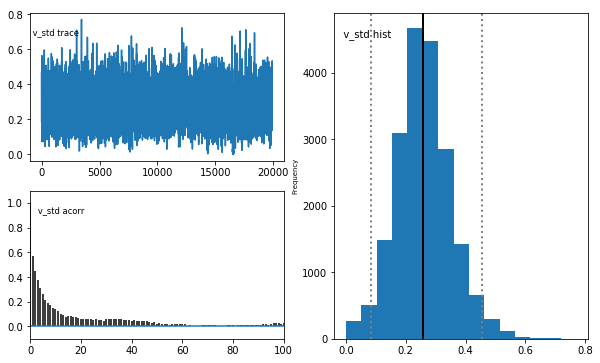

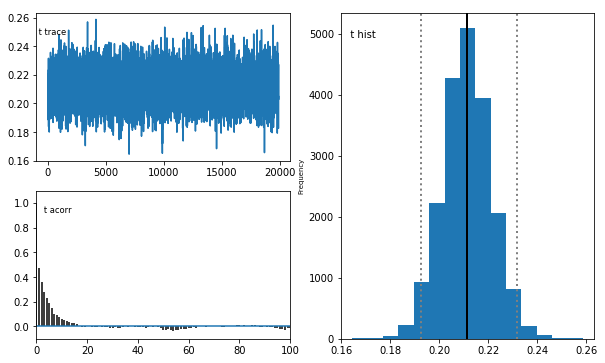

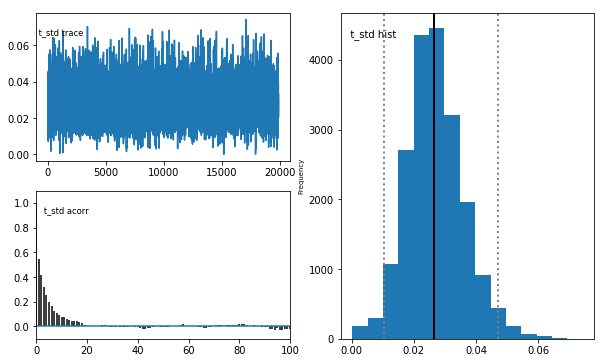

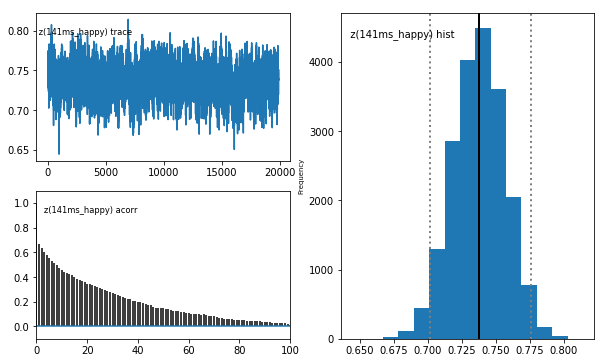

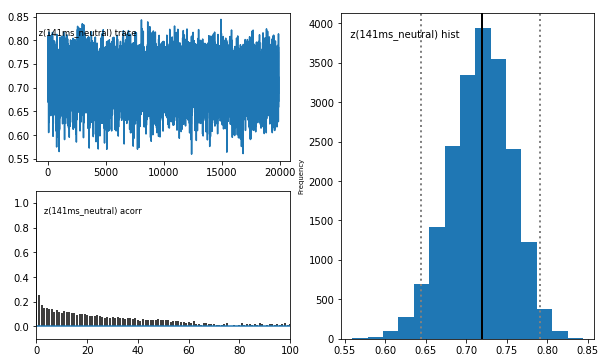

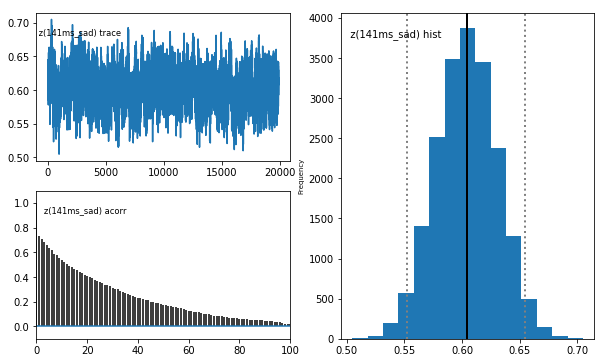

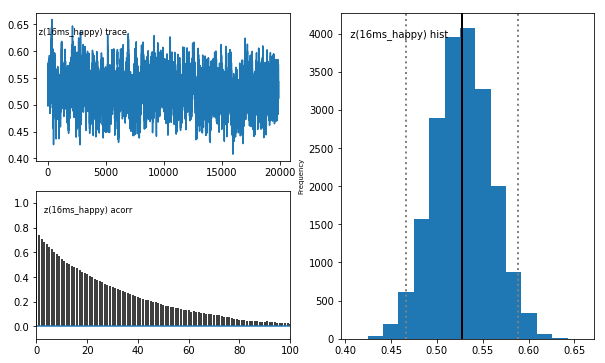

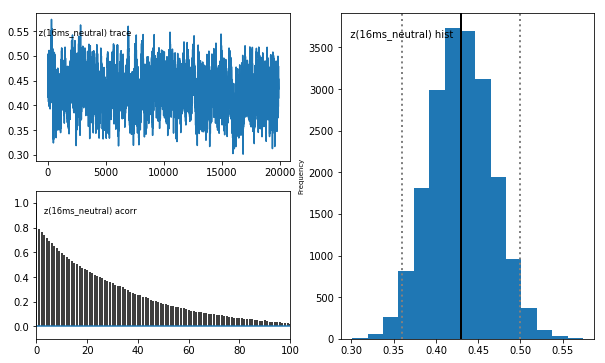

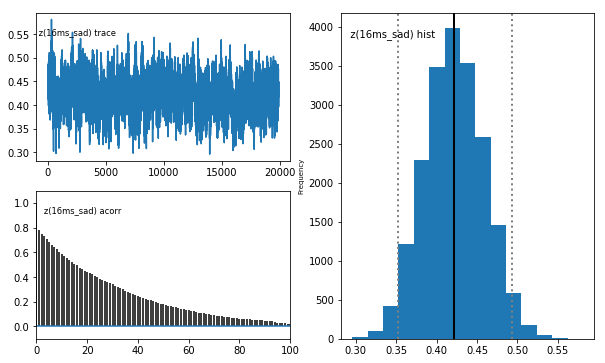

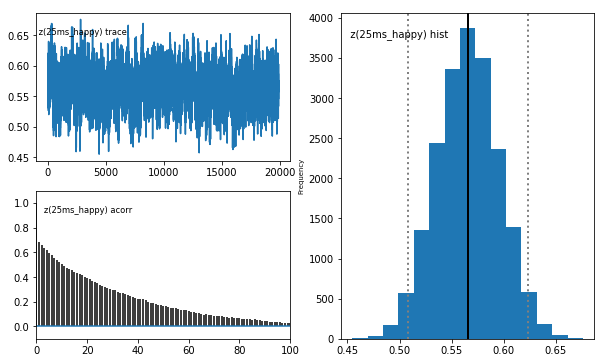

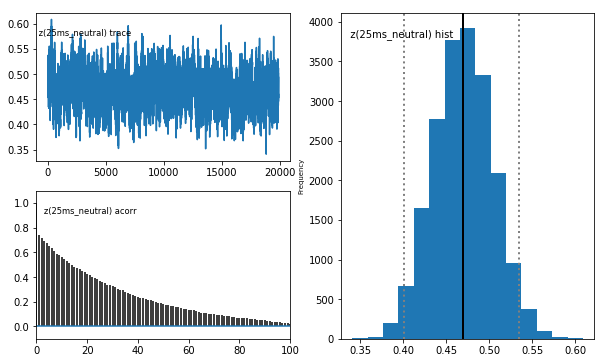

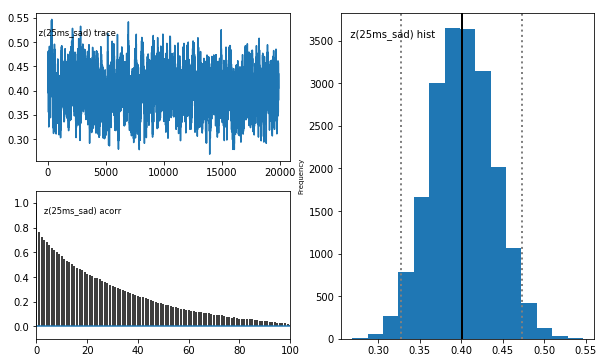

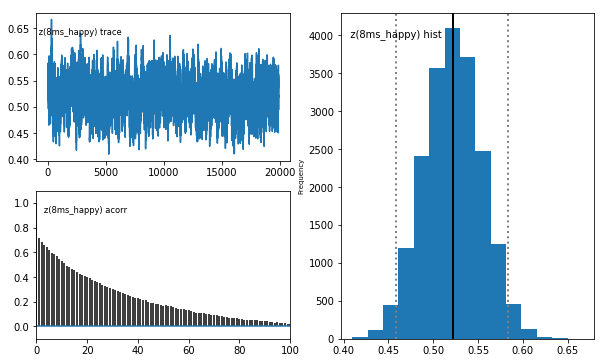

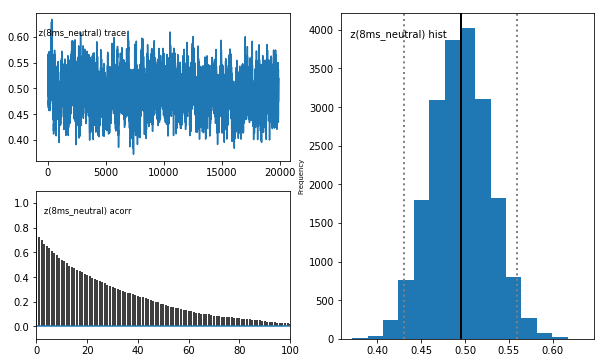

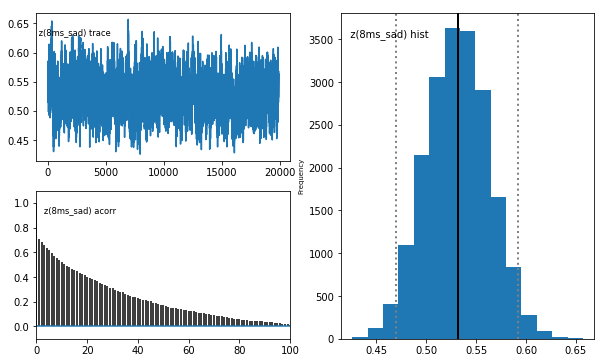

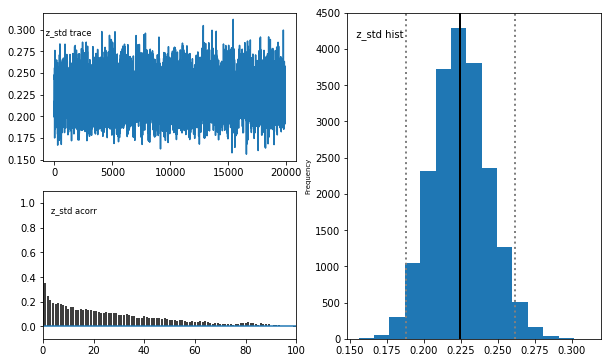

In [5]:
m_bias.plot_posteriors()

In [6]:
m_bias.print_stats()

                                                 mean         std       2.5q        25q        50q        75q      97.5q       mc err
a                                             3.88521     0.28159    3.38852    3.68608    3.86747    4.06695    4.48248    0.0120063
a_std                                        0.651815    0.158891   0.386818   0.540947   0.636494   0.745414     1.0075   0.00322177
a_subj.EMOCONPILOT001                         3.40382    0.317769    2.84403     3.1811    3.38097    3.60303    4.09103    0.0108512
a_subj.EMOCONPILOT003                         4.45025    0.446365    3.63053    4.14614    4.43261    4.73176    5.38657    0.0165872
a_subj.EMOCONPILOT004                         4.00613    0.398987    3.29264    3.72642    3.98453     4.2601    4.85197    0.0128926
a_subj.EMOCONPILOT005_120HZ                   3.65238     0.33253     3.0519    3.41913    3.63381    3.86832    4.34512    0.0114764
a_subj.EMOCONPILOT006                         3.15505    0.298

# Plot Bias for all conditions

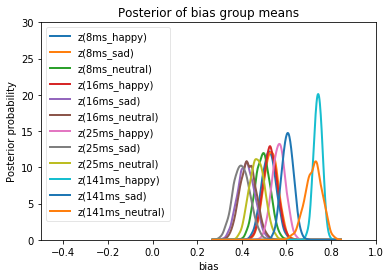

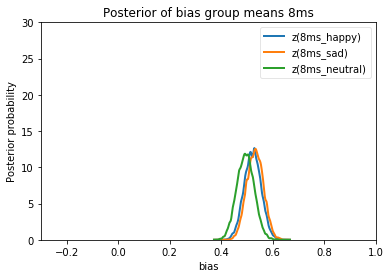

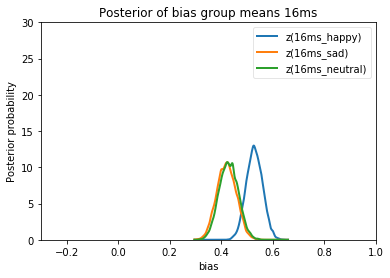

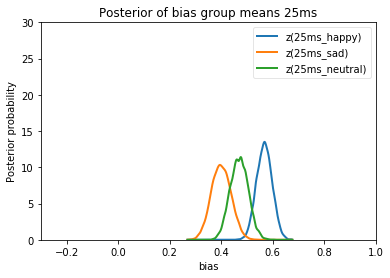

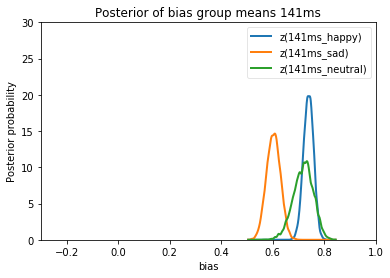

In [12]:
z_8ms_happy, z_8ms_sad, z_8ms_neutral,z_16ms_happy, z_16ms_sad, z_16ms_neutral, z_25ms_happy, z_25ms_sad, z_25ms_neutral, z_141ms_happy, z_141ms_sad, z_141ms_neutral  = m_bias.nodes_db.node[['z(8ms_happy)', 'z(8ms_sad)', 'z(8ms_neutral)','z(16ms_happy)', 'z(16ms_sad)', 'z(16ms_neutral)', 'z(25ms_happy)', 'z(25ms_sad)', 'z(25ms_neutral)', 'z(141ms_happy)', 'z(141ms_sad)', 'z(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_happy, z_8ms_sad, z_8ms_neutral,z_16ms_happy, z_16ms_sad, z_16ms_neutral, z_25ms_happy, z_25ms_sad, z_25ms_neutral, z_141ms_happy, z_141ms_sad, z_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(-0.5,1)
plt.ylim(0,30)

z_8ms_happy, z_8ms_sad, z_8ms_neutral= m_bias.nodes_db.node[['z(8ms_happy)', 'z(8ms_sad)', 'z(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_happy, z_8ms_sad, z_8ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 8ms')
plt.xlim(-0.3,1)
plt.ylim(0,30)

z_16ms_happy, z_16ms_sad, z_16ms_neutral= m_bias.nodes_db.node[['z(16ms_happy)', 'z(16ms_sad)', 'z(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_16ms_happy, z_16ms_sad, z_16ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 16ms')
plt.xlim(-0.3,1)
plt.ylim(0,30)

z_25ms_happy, z_25ms_sad, z_25ms_neutral= m_bias.nodes_db.node[['z(25ms_happy)', 'z(25ms_sad)', 'z(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_25ms_happy, z_25ms_sad, z_25ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 25ms')
plt.xlim(-0.3,1)
plt.ylim(0,30)

z_141ms_happy, z_141ms_sad, z_141ms_neutral= m_bias.nodes_db.node[['z(141ms_happy)', 'z(141ms_sad)', 'z(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_141ms_happy, z_141ms_sad, z_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 141ms')
plt.xlim(-0.3,1)
plt.ylim(0,30)


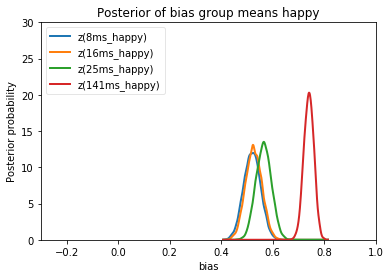

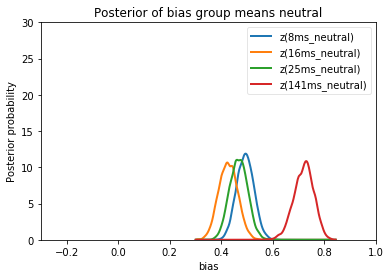

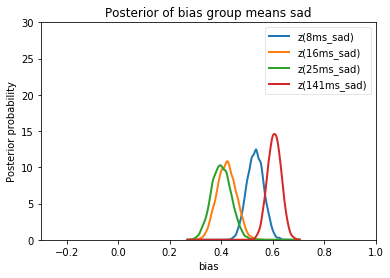

In [11]:
z_8ms_happy, z_16ms_happy, z_25ms_happy, z_141ms_happy= m_bias.nodes_db.node[['z(8ms_happy)', 'z(16ms_happy)', 'z(25ms_happy)', 'z(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_happy, z_16ms_happy, z_25ms_happy, z_141ms_happy])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means happy')
plt.xlim(-0.3,1)
plt.ylim(0,30)

z_8ms_neutral, z_16ms_neutral, z_25ms_neutral, z_141ms_neutral= m_bias.nodes_db.node[['z(8ms_neutral)', 'z(16ms_neutral)', 'z(25ms_neutral)', 'z(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_neutral, z_16ms_neutral, z_25ms_neutral, z_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means neutral')
plt.xlim(-0.3,1)
plt.ylim(0,30)

z_8ms_sad, z_16ms_sad, z_25ms_sad, z_141ms_sad= m_bias.nodes_db.node[['z(8ms_sad)', 'z(16ms_sad)', 'z(25ms_sad)', 'z(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_sad, z_16ms_sad, z_25ms_sad, z_141ms_sad])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means sad')
plt.xlim(-0.3,1)
plt.ylim(0,30)


# Get Statistics

In [9]:
print "P(8ms_happy > 8ms_sad)=",(z_8ms_happy.trace() > z_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(z_8ms_happy.trace() > z_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(z_16ms_happy.trace() > z_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(z_16ms_happy.trace() > z_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(z_25ms_happy.trace() > z_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(z_25ms_happy.trace() > z_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(z_141ms_happy.trace() > z_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(z_141ms_happy.trace() > z_141ms_neutral.trace()).mean()

print "P(8ms_happy > 16ms_happy)=",(z_8ms_happy.trace() > z_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(z_8ms_happy.trace() > z_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(z_8ms_happy.trace() > z_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(z_16ms_happy.trace() > z_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(z_16ms_happy.trace() > z_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(z_25ms_happy.trace() > z_141ms_happy.trace()).mean()

print "P(8ms_sad > 16ms_sad)=",(z_8ms_sad.trace() > z_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(z_8ms_sad.trace() > z_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(z_8ms_sad.trace() > z_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(z_16ms_sad.trace() > z_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(z_16ms_sad.trace() > z_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(z_25ms_sad.trace() > z_141ms_sad.trace()).mean()

print "P(8ms_neutral > 16ms_neutral)=",(z_8ms_neutral.trace() > z_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(z_8ms_neutral.trace() > z_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(z_8ms_neutral.trace() > z_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(z_16ms_neutral.trace() > z_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(z_16ms_neutral.trace() > z_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(z_25ms_neutral.trace() > z_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 0.34231155778894473
P(8ms_happy > 8ms_neutral)= 0.8712562814070351
P(16ms_happy > 16ms_sad)= 1.0
P(16ms_happy > 16ms_neutral)= 0.9999497487437186
P(25ms_happy > 25ms_sad)= 1.0
P(25ms_happy > 25ms_neutral)= 1.0
P(141ms_happy > 141ms_sad)= 1.0
P(141ms_happy > 141ms_neutral)= 0.7002010050251256
P(8ms_happy > 16ms_happy)= 0.3934673366834171
P(8ms_happy > 25ms_happy)= 0.034522613065326634
P(8ms_happy > 141ms_happy)= 0.0
P(16ms_happy > 25ms_happy)= 0.05005025125628141
P(16ms_happy > 141ms_happy)= 0.0
P(25ms_happy > 141ms_happy)= 0.0
P(8ms_sad > 16ms_sad)= 1.0
P(8ms_sad > 25ms_sad)= 1.0
P(8ms_sad > 141ms_sad)= 0.0004020100502512563
P(16ms_sad > 25ms_sad)= 0.7921105527638191
P(16ms_sad > 141ms_sad)= 0.0
P(25ms_sad > 141ms_sad)= 0.0
P(8ms_neutral > 16ms_neutral)= 0.9968844221105527
P(8ms_neutral > 25ms_neutral)= 0.8478391959798995
P(8ms_neutral > 141ms_neutral)= 0.0
P(16ms_neutral > 25ms_neutral)= 0.048693467336683414
P(16ms_neutral > 141ms_neutral)= 0.0
P(25ms_neutral >

# Estimate Main Effects

# Model for drift-rate depending on main effects
### Gelman Rubin R Statistic for convergence check

In [13]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_stim = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'stim'})    #, depends_on={'v': 'stim'})
    model_stim.find_starting_values()
    model_stim.sample(2000, burn=20) 
    models.append(model_stim)
hddm.analyze.gelman_rubin(models)


 [-----------------100%-----------------] 2000 of 2000 complete in 101.8 sec

{'a': 1.0069258350277235,
 'a_std': 1.0011672704251864,
 'a_subj.EMOCONPILOT001': 1.0241838498621119,
 'a_subj.EMOCONPILOT003': 1.0101852979982433,
 'a_subj.EMOCONPILOT004': 1.0067355318556925,
 'a_subj.EMOCONPILOT005_120HZ': 1.0062058666326403,
 'a_subj.EMOCONPILOT006': 1.004310463498248,
 'a_subj.EMOCONPILOT007': 1.002545378319767,
 'a_subj.EMOCONPILOT008': 1.0041415365910433,
 'a_subj.EMOCONPILOT009': 1.0075324342757936,
 'a_subj.EMOCONPILOT010': 1.0067743781008105,
 'a_subj.EMOCONPILOT011': 1.010966939916991,
 'a_subj.EMOCONPILOT014': 1.0067432650383796,
 'a_subj.EMOCONPILOT015': 1.0048181899957556,
 'a_subj.EMOCONPILOT016': 1.003251939895759,
 'a_subj.EMOCONPILOT017': 1.0052890467657585,
 'a_subj.EMOCONPILOT018': 1.0031668805290976,
 'a_subj.EMOCONPILOT020': 1.004588271086782,
 'a_subj.EMOCONPILOT021': 1.0084930465829771,
 'a_subj.EMOCONPILOT022': 1.0068272799850537,
 'a_subj.EMOCONPILOT024': 1.006535774722586,
 'a_subj.EmoCon002': 1.0092410004784156,
 't': 1.0042586972043293,
 't

In [51]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_level = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'level'})    #, depends_on={'v': 'stim'})
    model_level.find_starting_values()
    model_level.sample(2000, burn=20) 
    models.append(model_level)
hddm.analyze.gelman_rubin(models)


 [-----------------100%-----------------] 2000 of 2000 complete in 177.8 sec

{'a': 0.9994998749374608,
 'a_std': 0.9994998749374608,
 'a_subj.EMOCONPILOT001': 0.999499874937461,
 'a_subj.EMOCONPILOT003': 0.999499874937461,
 'a_subj.EMOCONPILOT004': 0.999499874937461,
 'a_subj.EMOCONPILOT005_120HZ': 0.9994998749374608,
 'a_subj.EMOCONPILOT006': 0.999499874937461,
 'a_subj.EMOCONPILOT007': 0.999499874937461,
 'a_subj.EMOCONPILOT008': 0.999499874937461,
 'a_subj.EMOCONPILOT009': 0.999499874937461,
 'a_subj.EMOCONPILOT010': 0.999499874937461,
 'a_subj.EMOCONPILOT011': 0.999499874937461,
 'a_subj.EMOCONPILOT014': 0.999499874937461,
 'a_subj.EMOCONPILOT015': 0.999499874937461,
 'a_subj.EMOCONPILOT016': 0.999499874937461,
 'a_subj.EMOCONPILOT017': 0.999499874937461,
 'a_subj.EMOCONPILOT018': 0.999499874937461,
 'a_subj.EMOCONPILOT020': 0.9994998749374608,
 'a_subj.EMOCONPILOT021': 0.999499874937461,
 'a_subj.EMOCONPILOT022': 0.999499874937461,
 'a_subj.EMOCONPILOT024': 0.9994998749374608,
 'a_subj.EmoCon002': 0.999499874937461,
 't': 0.999499874937461,
 't_std': 0.999

Plotting a
Plotting a_std
Plotting v(happy)
Plotting v(neutral)
Plotting v(sad)
Plotting v_std
Plotting t
Plotting t_std


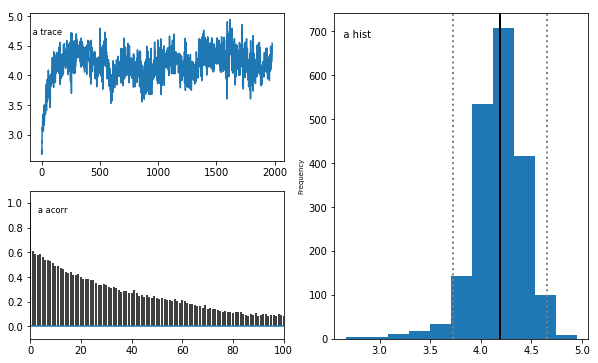

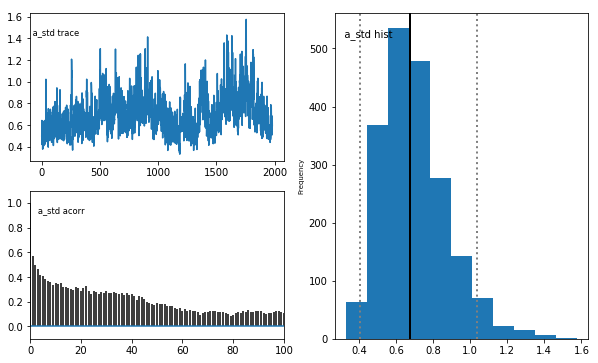

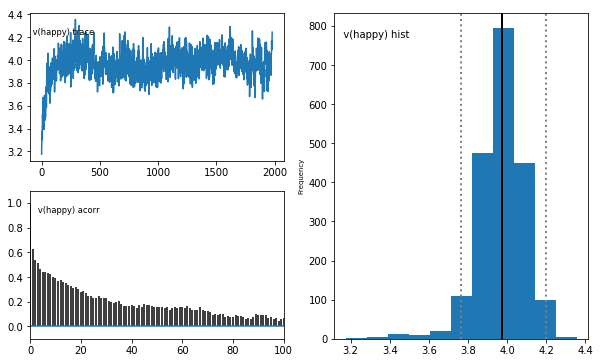

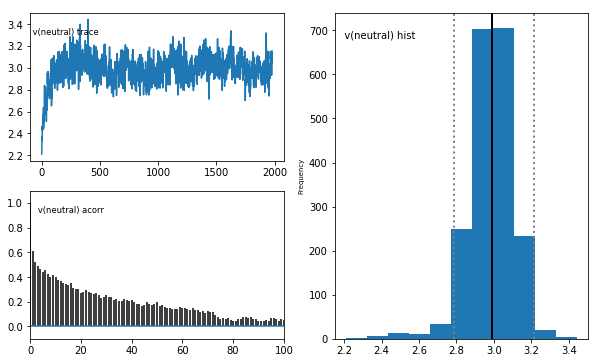

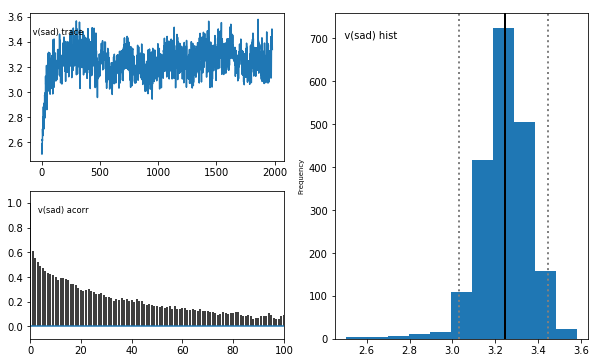

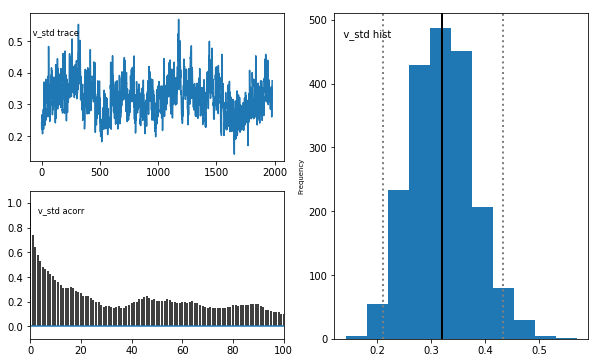

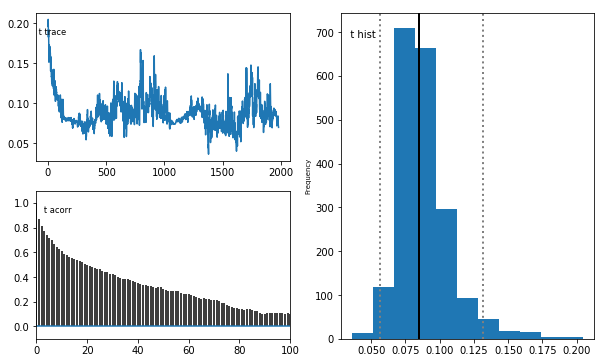

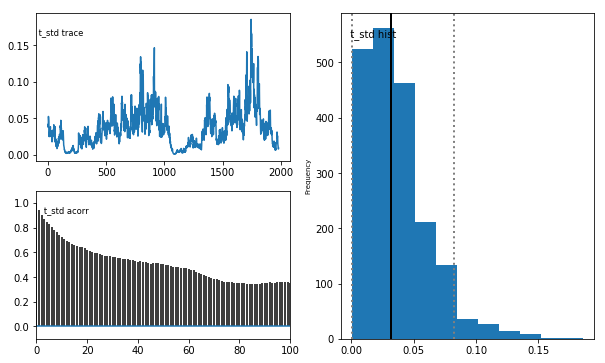

In [33]:
model_stim.plot_posteriors()

In [34]:
model_stim.print_stats()

                                           mean        std        2.5q        25q        50q        75q     97.5q      mc err
a                                       4.17527   0.251716     3.60849    4.04233    4.19129      4.333   4.59582   0.0199742
a_std                                  0.699617   0.175527    0.438824   0.571087   0.674309    0.79799   1.10434   0.0116815
a_subj.EMOCONPILOT001                   3.71004   0.294739     3.10008    3.54979    3.73181    3.89843   4.25824   0.0244992
a_subj.EMOCONPILOT003                   4.87086   0.365125     4.04601    4.68112    4.90845    5.09571   5.57268   0.0298028
a_subj.EMOCONPILOT004                   4.21923   0.328516     3.56053    4.01117     4.2069    4.43032   4.85746   0.0264954
a_subj.EMOCONPILOT005_120HZ             3.16444   0.294113     2.52978    2.99748    3.18425    3.36251   3.67387   0.0250259
a_subj.EMOCONPILOT006                   3.64786   0.412213     2.88728    3.33783    3.64999    3.98987   4.36761   0.

Plotting a
Plotting a_std
Plotting v(141ms)
Plotting v(16ms)
Plotting v(25ms)
Plotting v(8ms)
Plotting v_std
Plotting t
Plotting t_std


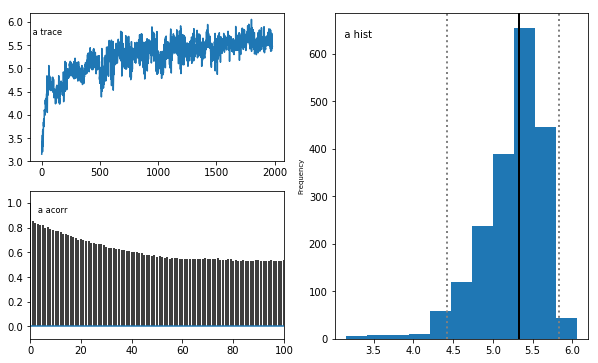

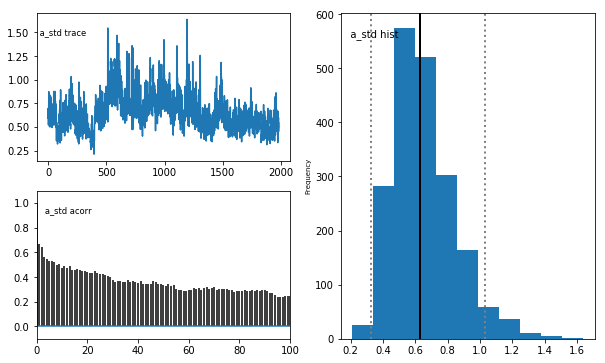

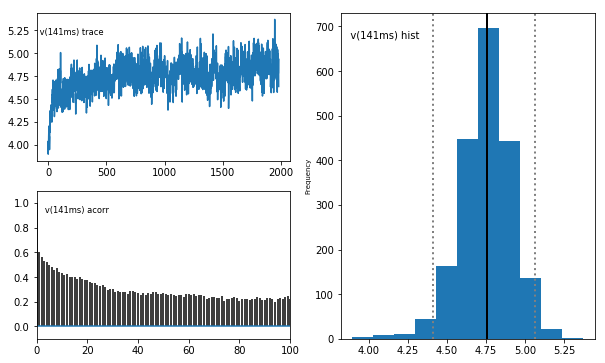

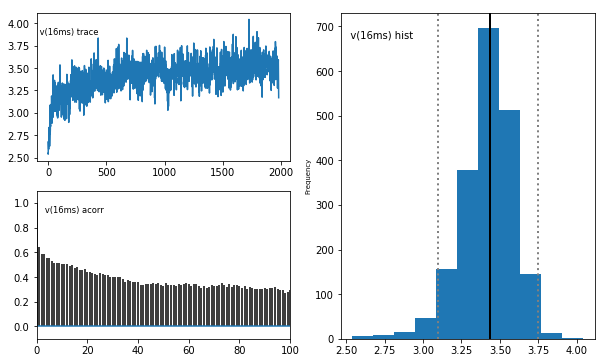

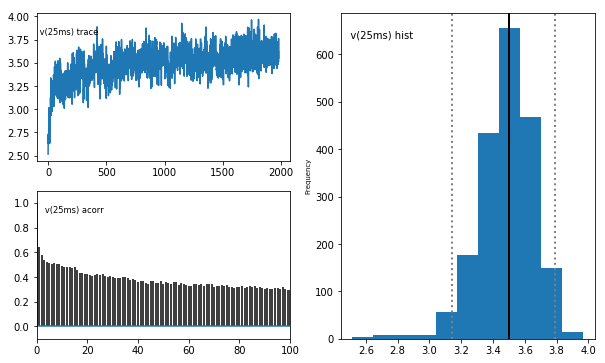

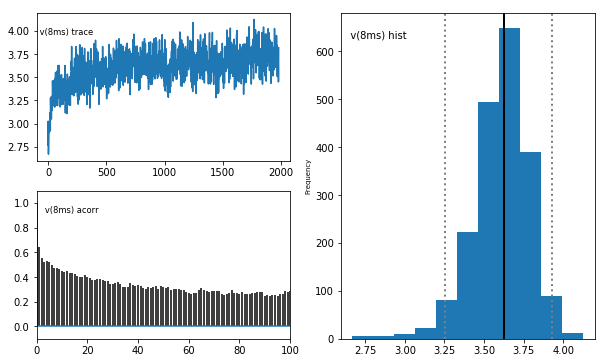

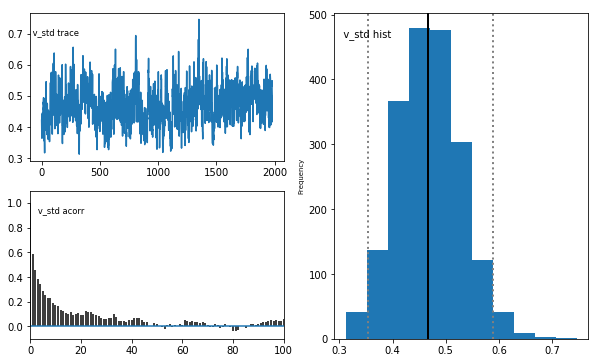

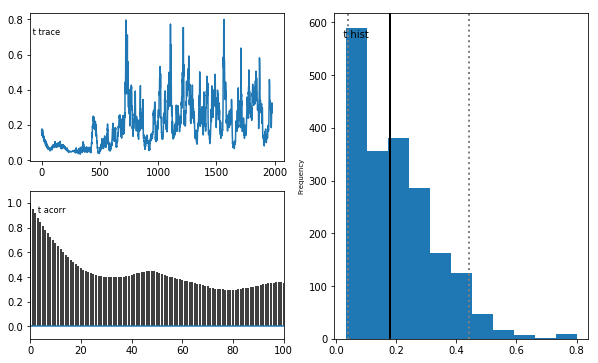

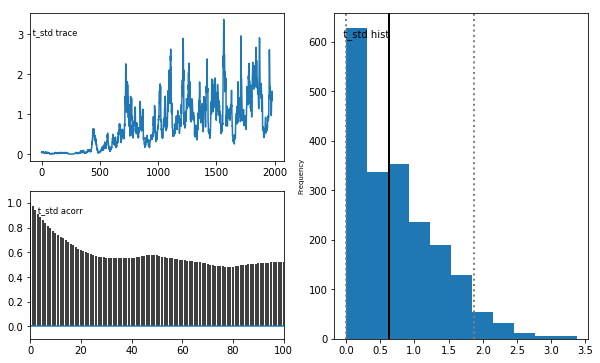

In [35]:
model_level.plot_posteriors()

In [36]:
model_level.print_stats()

                                         mean        std         2.5q          25q          50q         75q      97.5q      mc err
a                                     5.24161   0.398017       4.3208      5.04363       5.3273     5.52497    5.77965   0.0366427
a_std                                0.655632    0.19222     0.367513     0.519323     0.627449    0.757514    1.14249   0.0146578
a_subj.EMOCONPILOT001                 4.86453    0.47796      3.74088      4.57409      4.99131     5.20196    5.55192   0.0449357
a_subj.EMOCONPILOT003                 5.89292   0.544997      4.78878      5.50133      6.02502     6.27814    6.71159   0.0497751
a_subj.EMOCONPILOT004                 5.06783   0.384386       4.1748      4.87573      5.12459     5.32951    5.64175   0.0335863
a_subj.EMOCONPILOT005_120HZ            4.9163   0.396644      3.89986      4.77246      5.02255      5.1701    5.43764   0.0370296
a_subj.EMOCONPILOT006                 4.56296    0.58076      3.45679      4.16236 

# Plot drift-rate for main effects

In [37]:
import matplotlib.pyplot

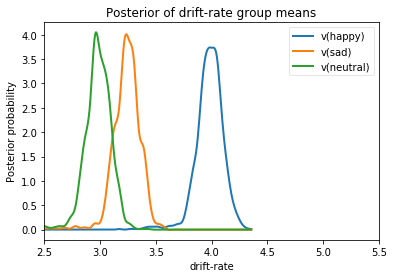

In [71]:
v_happy, v_sad, v_neutral = model_stim.nodes_db.node[['v(happy)', 'v(sad)', 'v(neutral)']] 
hddm.analyze.plot_posterior_nodes([v_happy, v_sad, v_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2.5,5.5)


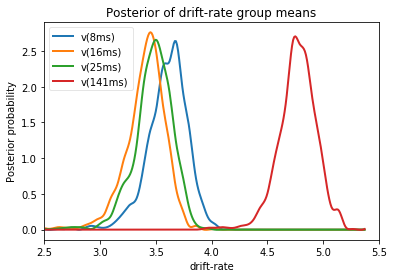

In [72]:
v_8ms, v_16ms, v_25ms, v_141ms = model_level.nodes_db.node[['v(8ms)', 'v(16ms)', 'v(25ms)', 'v(141ms)']] 
hddm.analyze.plot_posterior_nodes([v_8ms, v_16ms, v_25ms, v_141ms])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2.5,5.5)


# Get Statistics

In [ ]:
print "P(happy > sad)=",(v_happy.trace() > v_sad.trace()).mean()
print "P(sad > happy)=",(v_sad.trace() > v_happy.trace()).mean()
print "P(happy > neutral)=",(v_happy.trace() > v_neutral.trace()).mean()
print "P(sad > neutral)=",(v_sad.trace() > v_neutral.trace()).mean()

In [49]:
print "P(8ms > 16ms) =",(v_8ms.trace() > v_16ms.trace()).mean()
print "P(8ms > 25ms) =",(v_8ms.trace() > v_25ms.trace()).mean()
print "P(16ms > 25ms) =",(v_16ms.trace() > v_25ms.trace()).mean()
print "P(25ms > 141ms) =",(v_25ms.trace() > v_141ms.trace()).mean()
print "P(16ms > 141ms) =",(v_16ms.trace() > v_141ms.trace()).mean()
print "P(8ms > 141ms) =",(v_8ms.trace() > v_141ms.trace()).mean()

P(8ms > 16ms) = 0.8808080808080808
P(8ms > 25ms) = 0.7717171717171717
P(16ms > 25ms) = 0.32272727272727275
P(25ms > 141ms) = 0.0
P(16ms > 141ms) = 0.0
P(8ms > 141ms) = 0.0


# Model for bias depending on main effects
### Gelman Rubin R Statistic for convergence check

In [3]:
models = list()
for i in range(5):
    model_level_bias = hddm.HDDM(data, bias = True, p_outlier=0.05, depends_on={'z': 'level'})    
    model_level_bias.find_starting_values()
    model_level_bias.sample(10000, burn=500, thin=5) # (100000, burn=500, thin=5)
    models.append(model_level_bias)
hddm.analyze.gelman_rubin(models)

C:\Users\juhoffmann\Anaconda3\envs\hddm_analysis\lib\site-packages\scipy\optimize\optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 10000 of 10000 complete in 715.4 sec

{'a': 1.0323380597029295,
 'a_std': 1.004248404196954,
 'a_subj.EMOCONPILOT001': 1.0192138114415694,
 'a_subj.EMOCONPILOT003': 1.0224069111971987,
 'a_subj.EMOCONPILOT004': 1.0180842990784025,
 'a_subj.EMOCONPILOT005_120HZ': 1.0298811829616936,
 'a_subj.EMOCONPILOT006': 1.0289715689595587,
 'a_subj.EMOCONPILOT007': 1.0212306993913556,
 'a_subj.EMOCONPILOT008': 1.021847752597844,
 'a_subj.EMOCONPILOT009': 1.024538014952326,
 'a_subj.EMOCONPILOT010': 1.0224167115469296,
 'a_subj.EMOCONPILOT011': 1.024480440324285,
 'a_subj.EMOCONPILOT014': 1.0177174482968896,
 'a_subj.EMOCONPILOT015': 1.0229790893121569,
 'a_subj.EMOCONPILOT016': 1.0255932227098024,
 'a_subj.EMOCONPILOT017': 1.0270198118943183,
 'a_subj.EMOCONPILOT018': 1.0241900688903063,
 'a_subj.EMOCONPILOT020': 1.0243072232255666,
 'a_subj.EMOCONPILOT021': 1.0256119619805555,
 'a_subj.EMOCONPILOT022': 1.0192557853377064,
 'a_subj.EMOCONPILOT024': 1.022445269962152,
 'a_subj.EmoCon002': 1.0248472914628028,
 't': 1.0028845328338796,
 '

In [7]:
models = list()
for i in range(5):
    model_stim_bias = hddm.HDDM(data, bias=True, p_outlier=0.05, depends_on={'z': 'stim'})   
    model_stim_bias.find_starting_values()
    model_stim_bias.sample(10000, burn=500, thin=5) 
    models.append(model_stim_bias)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 10000 of 10000 complete in 664.5 sec

{'a': 1.0368266450236947,
 'a_std': 1.0060714483710076,
 'a_subj.EMOCONPILOT001': 1.0307889265119394,
 'a_subj.EMOCONPILOT003': 1.0263131475409004,
 'a_subj.EMOCONPILOT004': 1.0288277529427103,
 'a_subj.EMOCONPILOT005_120HZ': 1.016930452477992,
 'a_subj.EMOCONPILOT006': 1.0183130180693682,
 'a_subj.EMOCONPILOT007': 1.02680487503463,
 'a_subj.EMOCONPILOT008': 1.0254819123775847,
 'a_subj.EMOCONPILOT009': 1.0360837516289978,
 'a_subj.EMOCONPILOT010': 1.030119178898082,
 'a_subj.EMOCONPILOT011': 1.0297727742565628,
 'a_subj.EMOCONPILOT014': 1.0217902418638738,
 'a_subj.EMOCONPILOT015': 1.0275404476737935,
 'a_subj.EMOCONPILOT016': 1.0309831628373105,
 'a_subj.EMOCONPILOT017': 1.0277531238480921,
 'a_subj.EMOCONPILOT018': 1.0195865237590398,
 'a_subj.EMOCONPILOT020': 1.0255521402166128,
 'a_subj.EMOCONPILOT021': 1.0267494012386509,
 'a_subj.EMOCONPILOT022': 1.0275467493078125,
 'a_subj.EMOCONPILOT024': 1.0186468499271728,
 'a_subj.EmoCon002': 1.030901929894501,
 't': 1.0050585909285699,
 '

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(happy)
Plotting z(neutral)
Plotting z(sad)
Plotting z_std


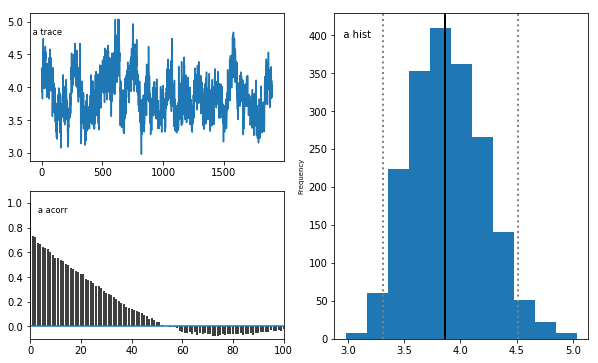

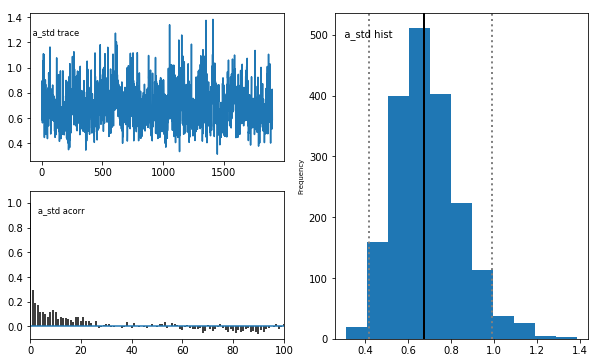

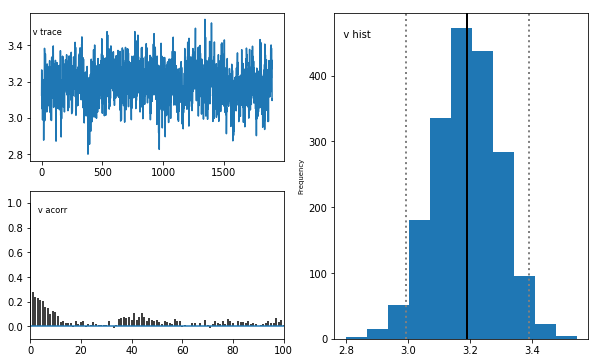

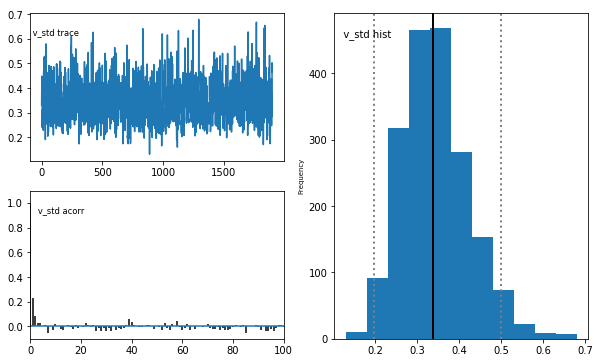

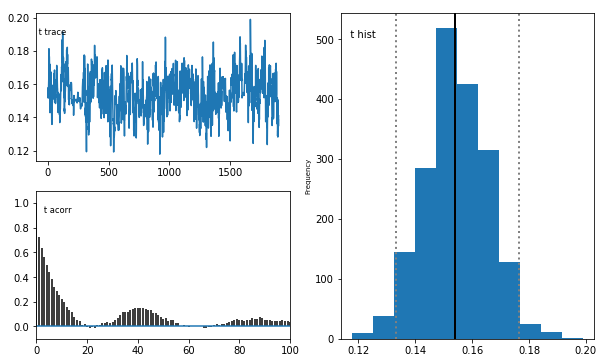

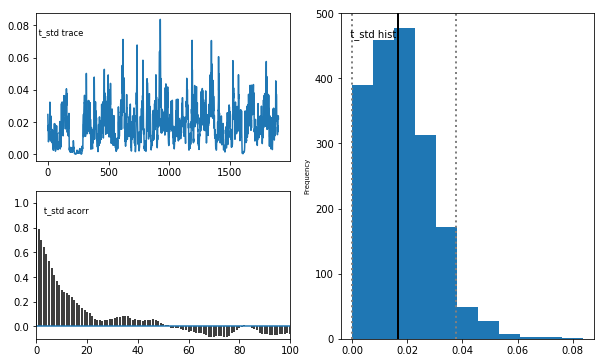

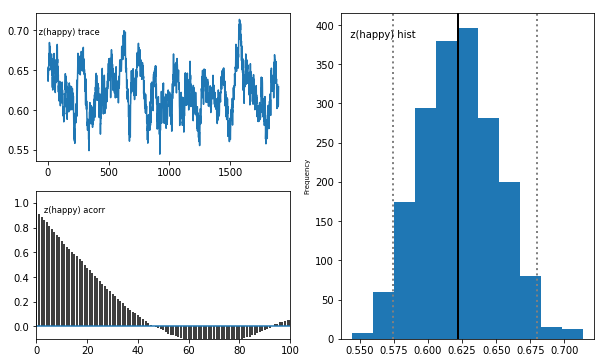

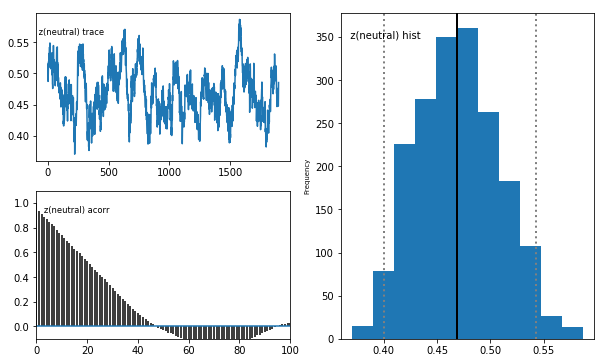

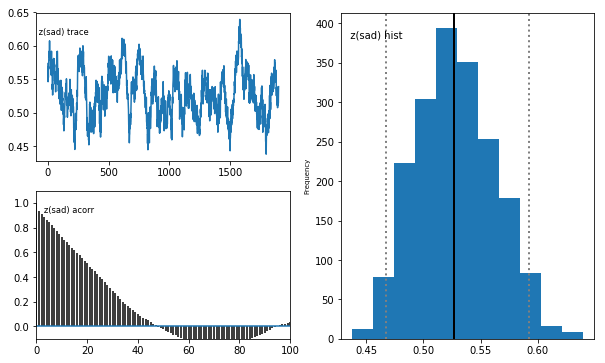

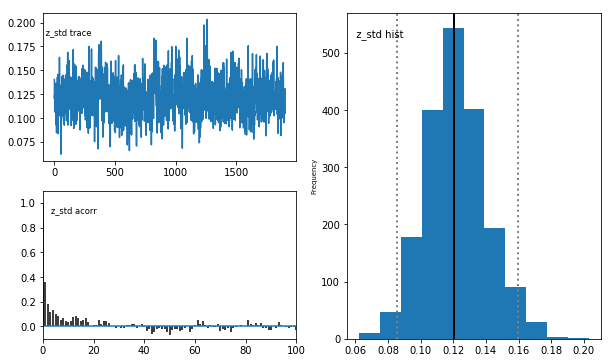

In [8]:
model_stim_bias.plot_posteriors()

In [9]:
model_stim_bias.print_stats()

                                           mean        std         2.5q         25q        50q        75q      97.5q       mc err
a                                       3.88662   0.326938      3.33213     3.63554    3.86324     4.1084    4.56262    0.0265232
a_std                                  0.691351   0.152238     0.446422    0.581301   0.675679   0.778641     1.0412   0.00649713
a_subj.EMOCONPILOT001                   3.47453   0.377164      2.83148     3.20791    3.43699    3.70271    4.30941    0.0278848
a_subj.EMOCONPILOT003                   4.55574   0.476514      3.71046     4.21451    4.51576    4.87538    5.53816    0.0349588
a_subj.EMOCONPILOT004                   3.77504   0.397958      3.03876      3.5017    3.75531    4.02052     4.6189    0.0271107
a_subj.EMOCONPILOT005_120HZ             2.68437   0.291974      2.18625      2.4791    2.65225    2.86465    3.34764    0.0205031
a_subj.EMOCONPILOT006                    3.6455   0.402565      2.94052     3.35102    3.6

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(141ms)
Plotting z(16ms)
Plotting z(25ms)
Plotting z(8ms)
Plotting z_std


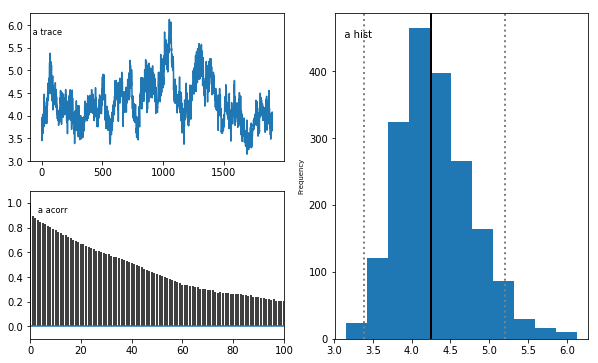

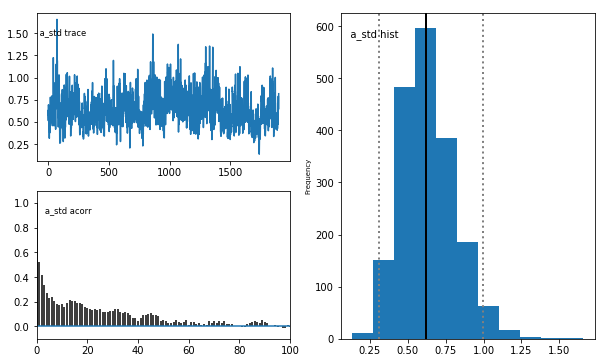

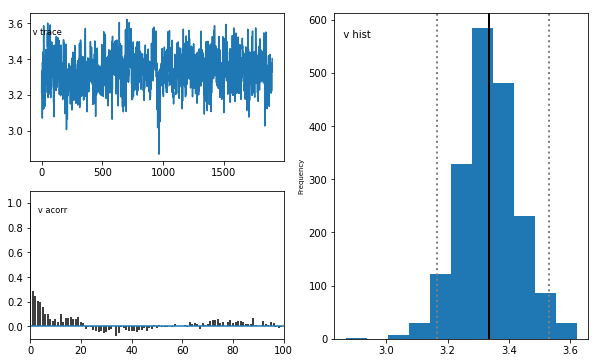

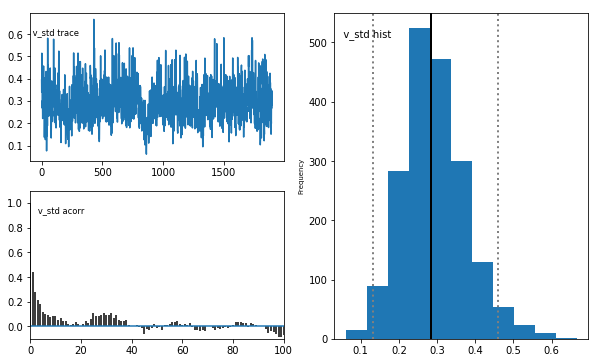

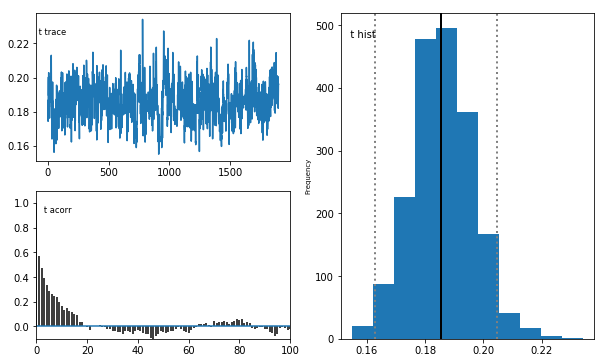

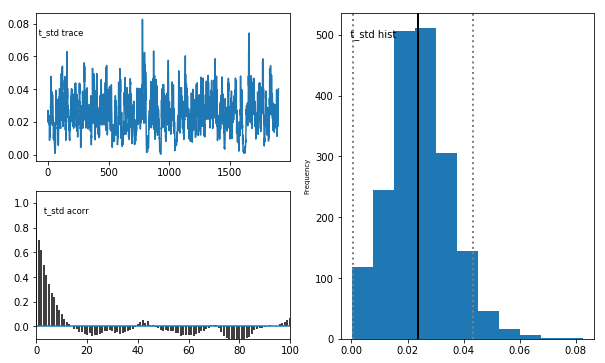

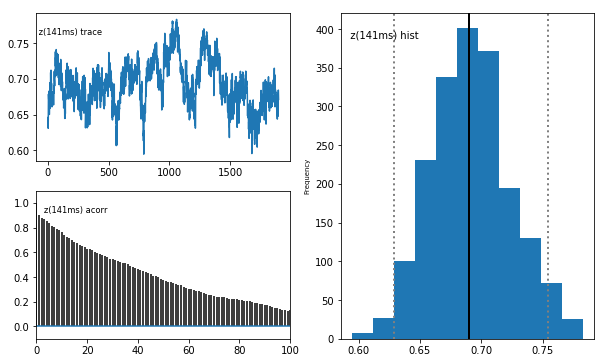

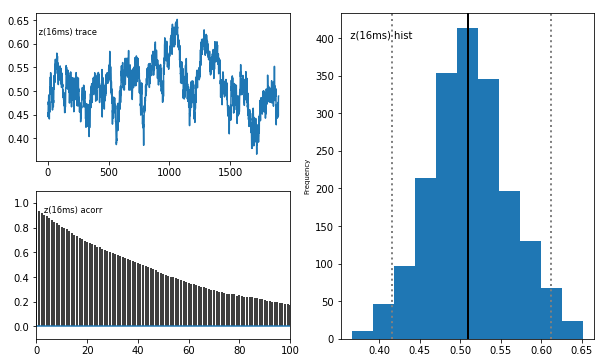

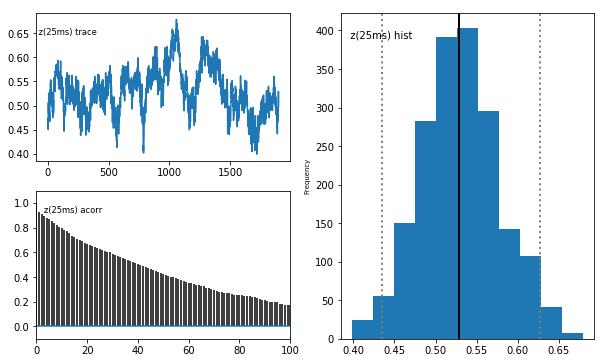

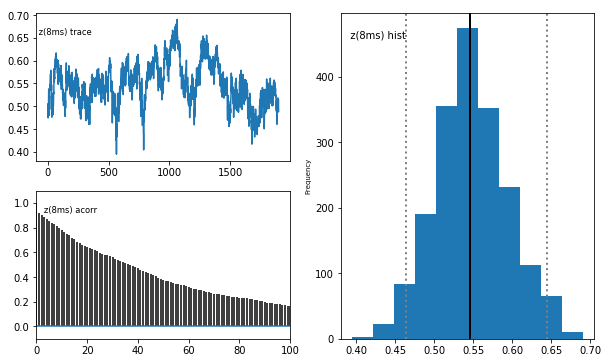

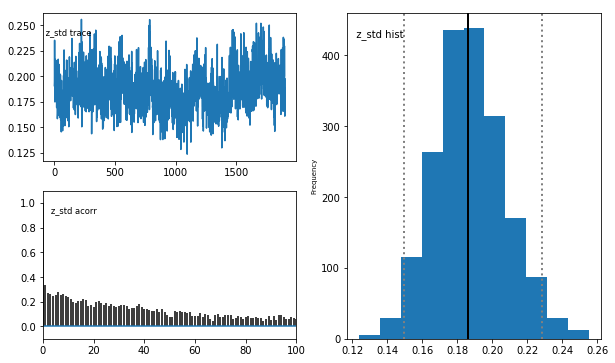

In [4]:
model_level_bias.plot_posteriors()

In [5]:
model_level_bias.print_stats()

                                         mean        std        2.5q       25q        50q        75q      97.5q       mc err
a                                     4.30501   0.475558     3.49229   3.97113    4.24804    4.59001    5.36887    0.0433947
a_std                                0.636302   0.179146     0.33605  0.510262   0.619237   0.741657    1.02452    0.0100272
a_subj.EMOCONPILOT001                 3.82745   0.478533     3.04449   3.47994    3.79166    4.10595    4.90219    0.0381326
a_subj.EMOCONPILOT003                 4.76771   0.633638     3.69955   4.31292    4.71241    5.17549    6.15543    0.0516943
a_subj.EMOCONPILOT004                  4.3762   0.571125     3.36712   3.96231    4.34395    4.71015      5.655    0.0441679
a_subj.EMOCONPILOT005_120HZ           3.91981   0.519495     3.05321    3.5539    3.85611    4.22994     5.1595    0.0424636
a_subj.EMOCONPILOT006                  3.6752   0.488501     2.84134   3.31974    3.62388    3.99526    4.73546    0.0392253


# Plot bias for main effects

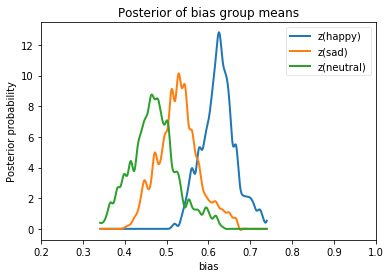

In [11]:
z_happy, z_sad, z_neutral = model_stim_bias.nodes_db.node[['z(happy)', 'z(sad)', 'z(neutral)']] 
hddm.analyze.plot_posterior_nodes([z_happy, z_sad, z_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0.2,1)

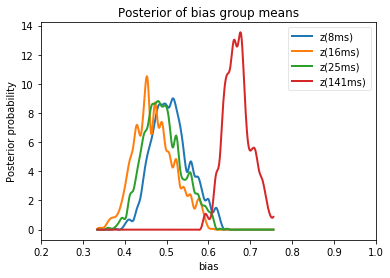

In [8]:
z_8ms, z_16ms, z_25ms, z_141ms = model_level_bias.nodes_db.node[['z(8ms)', 'z(16ms)', 'z(25ms)', 'z(141ms)']] 
hddm.analyze.plot_posterior_nodes([z_8ms, z_16ms, z_25ms, z_141ms])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0.2,1)

# Get Statistics

In [ ]:
print "P(happy > sad)=",(z_happy.trace() > z_sad.trace()).mean()
print "P(sad > happy)=",(z_sad.trace() > z_happy.trace()).mean()
print "P(happy > neutral)=",(z_happy.trace() > z_neutral.trace()).mean()
print "P(sad > neutral)=",(z_sad.trace() > z_neutral.trace()).mean()

In [9]:
print "P(8ms > 16ms)=",(z_8ms.trace() > z_16ms.trace()).mean()
print "P(8ms > 25ms)=",(z_8ms.trace() > z_25ms.trace()).mean()
print "P(8ms > 141ms)=",(z_8ms.trace() > z_141ms.trace()).mean()
print "P(16ms > 25ms)=",(z_16ms.trace() > z_25ms.trace()).mean()
print "P(16ms > 141ms)=",(z_16ms.trace() > z_141ms.trace()).mean()
print "P(25ms > 141ms)=",(z_25ms.trace() > z_141ms.trace()).mean()

P(8ms > 16ms)= 0.9773684210526316
P(8ms > 25ms)= 0.8473684210526315
P(8ms > 141ms)= 0.0
P(16ms > 25ms)= 0.1405263157894737
P(16ms > 141ms)= 0.0
P(25ms > 141ms)= 0.0
